In [1]:
import pandas as pd
from pandas import ExcelFile
from pandas.io.json import json_normalize 
import json

import string
import numpy as np
import seaborn as sns
import spacy
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set_style("ticks")
import os
%matplotlib inline

In [2]:
drugs_train= pd.read_csv("drugsCom_raw/drugsComTrain_raw.tsv", delimiter = '\t',parse_dates=True)
drugs_test= pd.read_csv("drugsCom_raw/drugsComTest_raw.tsv", delimiter = '\t',parse_dates=True )

# drugslib_test= pd.read_csv("drugLib_raw/drugLibTest_raw.tsv", delimiter = '\t',parse_dates=True )
# drugslib_train= pd.read_csv("drugLib_raw/drugLibTrain_raw.tsv", delimiter = '\t',parse_dates=True)
#drugs_class = pd.read_excel('product_class.xlsx')

In [3]:
print(drugs_test.drugName.nunique())
print(drugs_test.review.nunique())
print(drugs_test.shape)
print(drugs_train.drugName.nunique())
print(drugs_train.review.nunique())
print(drugs_train.shape)

2637
48280
(53766, 7)
3436
112329
(161297, 7)


In [4]:
drugs= pd.concat([drugs_train, drugs_test],axis=0, ignore_index=True)

In [5]:
print(drugs.drugName.nunique())
print(drugs.condition.nunique())
print(drugs.shape)

3671
916
(215063, 7)


In [6]:
drugs.date = pd.to_datetime(drugs.date)


In [7]:
drugs= drugs.rename(index = str, columns={'Unnamed: 0': 'UniqueID'})

In [8]:
drugs.head()

UniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...     9.0 2012-05-20   
1  "My son is halfway through his fourth week of ...     8.0 2010-04-27   
2  "I used to take another oral contraceptive, wh...     5.0 2009-12-14   
3  "This is my first time using any form of birth...     8.0 2015-11-03   
4  "Suboxone has completely turned my life around...     9.0 2016-11-27   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [9]:
#drugs_class= drugs_class.rename(index = str, columns={'PROPRIETARYNAME': 'drugName', 'PHARM_CLASSES': 'drugClass'})

In [10]:
#drugs= pd.merge(drugs_combined, drugs_class, on = 'drugName', how = 'left')

In [11]:
drugs.isnull().sum()

UniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [12]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 215062
Data columns (total 7 columns):
UniqueID       215063 non-null int64
drugName       215063 non-null object
condition      213869 non-null object
review         215063 non-null object
rating         215063 non-null float64
date           215063 non-null datetime64[ns]
usefulCount    215063 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 13.1+ MB


In [13]:
drugs.describe()

UniqueID         rating    usefulCount
count  215063.000000  215063.000000  215063.000000
mean   116039.364814       6.990008      28.001004
std     67007.913366       3.275554      36.346069
min         0.000000       1.000000       0.000000
25%     58115.500000       5.000000       6.000000
50%    115867.000000       8.000000      16.000000
75%    173963.500000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [14]:
drugs.columns

Index(['UniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [15]:
drugs.rating.value_counts()

10.0    68005
9.0     36708
1.0     28918
8.0     25046
7.0     12547
5.0     10723
2.0      9265
3.0      8718
6.0      8462
4.0      6671
Name: rating, dtype: int64

In [16]:
drugs.drugName.value_counts().head()

Levonorgestrel                       4930
Etonogestrel                         4421
Ethinyl estradiol / norethindrone    3753
Nexplanon                            2892
Ethinyl estradiol / norgestimate     2790
Name: drugName, dtype: int64

''

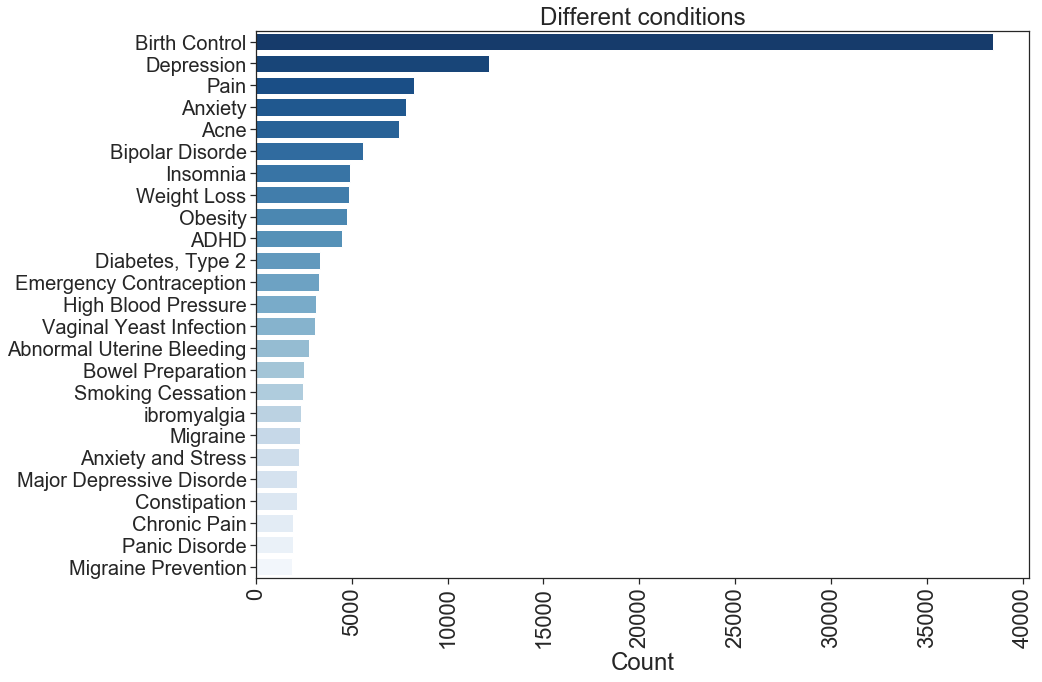

In [17]:
condition = drugs.condition.value_counts().reset_index().rename(columns={'index': 'condition', 'condition': 'Frequency'})
sns.set(rc={'figure.figsize':(15,10)}, font_scale=2)
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.barplot(y="condition", x="Frequency", data=condition.iloc[0:25], palette= 'Blues_r')
plt.title('Different conditions')
plt.ylabel('', fontsize=20)
plt.xlabel('Count')
plt.xticks(rotation = 90)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.savefig('Conditions in data.png')
;

In [18]:
df1 = drugs.drugName.nunique()


In [19]:
df1

3671

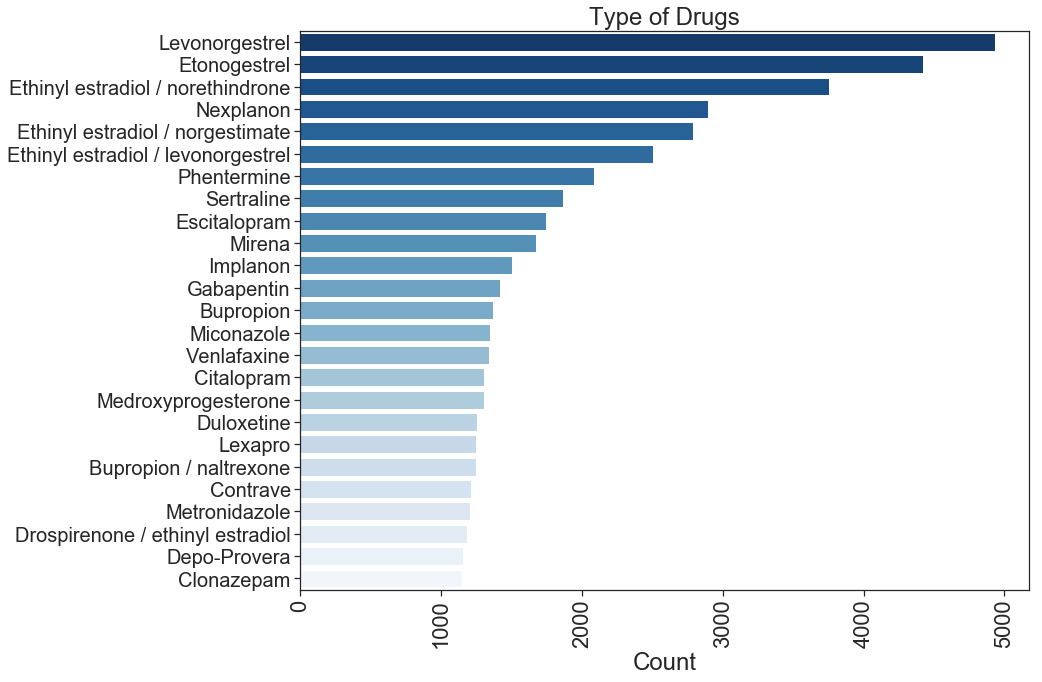

In [20]:
drug = drugs.drugName.value_counts().reset_index().rename(columns={'index': 'Drug', 'drugName': 'Frequency'})
sns.set(rc={'figure.figsize':(15,10)}, font_scale=2)
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.barplot(y="Drug", x="Frequency", data=drug.iloc[0:25], palette= 'Blues_r')
plt.title('Type of Drugs')
plt.ylabel('', fontsize=20)
plt.xlabel('Count')
plt.xticks(rotation = 90)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.savefig('drugs in data.png');

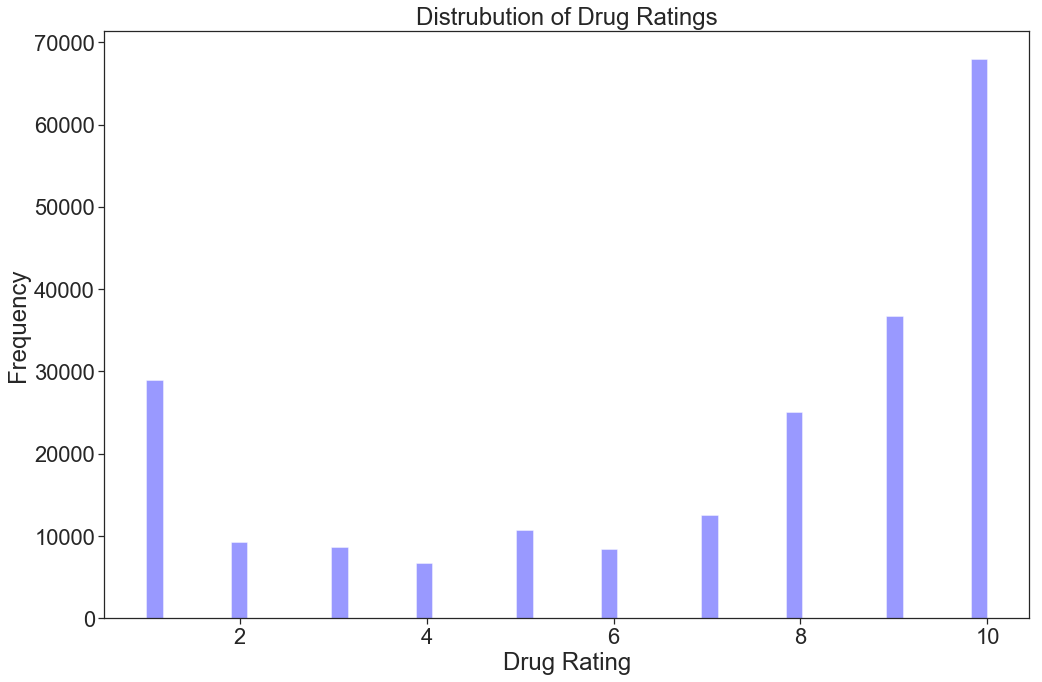

In [21]:
sns.distplot(drugs.rating, color = 'blue', kde= False)
sns.set_style("ticks")
plt.title('Distrubution of Drug Ratings')
plt.xlabel('Drug Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Rating Distribution in Drugs');

In [22]:
#drugs = fullmerge.groupby(['drugName'], as_index=False)['rating'].mean().round(decimals = 2)

In [23]:
drugs[drugs.condition == 'Diabetes, Type 2'].count()

UniqueID       3362
drugName       3362
condition      3362
review         3362
rating         3362
date           3362
usefulCount    3362
dtype: int64

In [24]:
drugs[drugs.drugName == 'Levonorgestrel'].count()

UniqueID       4930
drugName       4930
condition      4896
review         4930
rating         4930
date           4930
usefulCount    4930
dtype: int64

In [25]:
drugs.review[2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [26]:
drugs['review_length'] = drugs['review'].apply(len)
drugs.head()

UniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...     9.0 2012-05-20   
1  "My son is halfway through his fourth week of ...     8.0 2010-04-27   
2  "I used to take another oral contraceptive, wh...     5.0 2009-12-14   
3  "This is my first time using any form of birth...     8.0 2015-11-03   
4  "Suboxone has completely turned my life around...     9.0 2016-11-27   

   usefulCount  review_length  
0           27             79  
1          192            741  
2           17            755  
3           10            448  
4           37            719

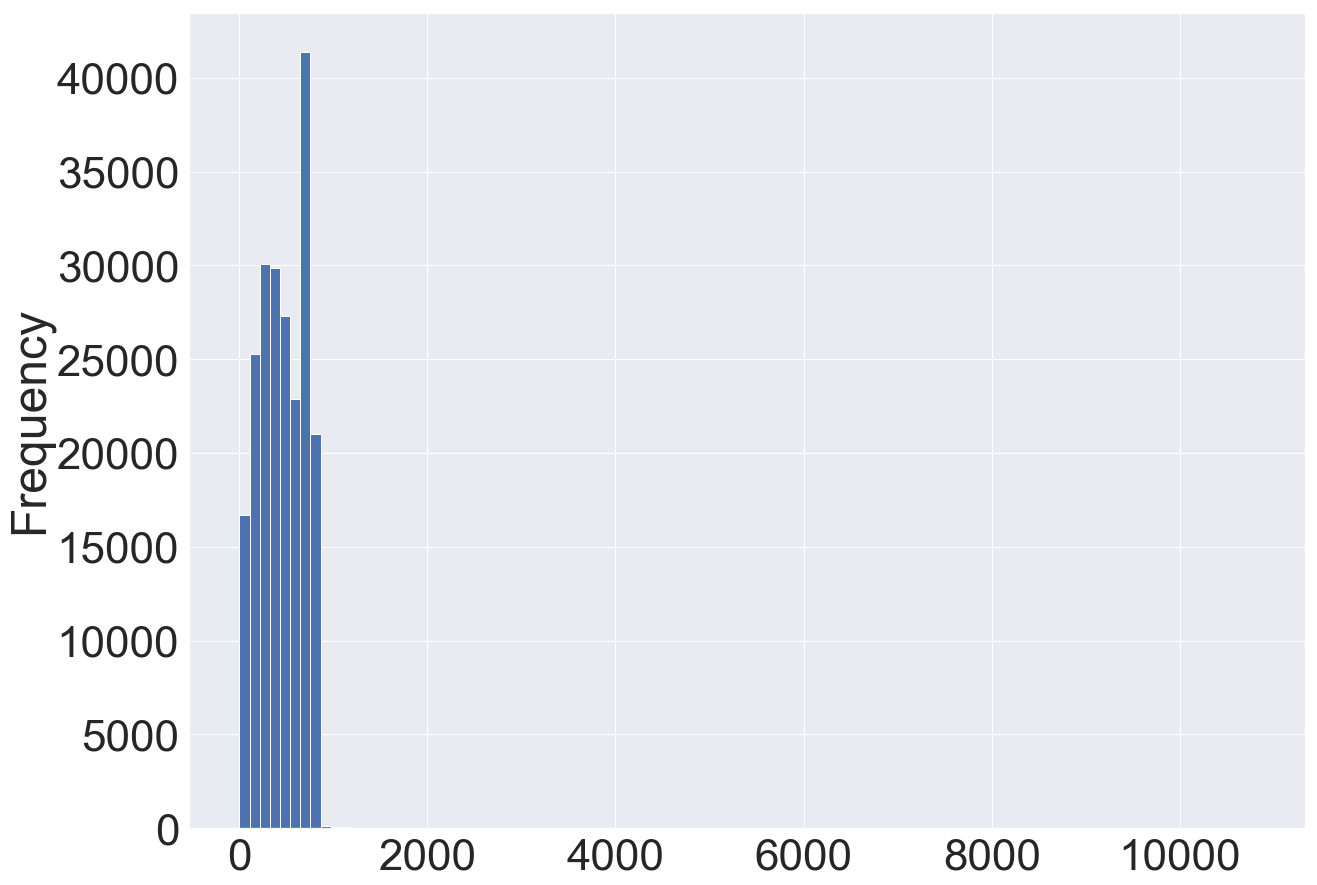

In [27]:
sns.set(style="darkgrid", rc={'figure.figsize':(20,15)},color_codes=True,font_scale=4)
drugs['review_length'].plot(bins=100, kind='hist'); 

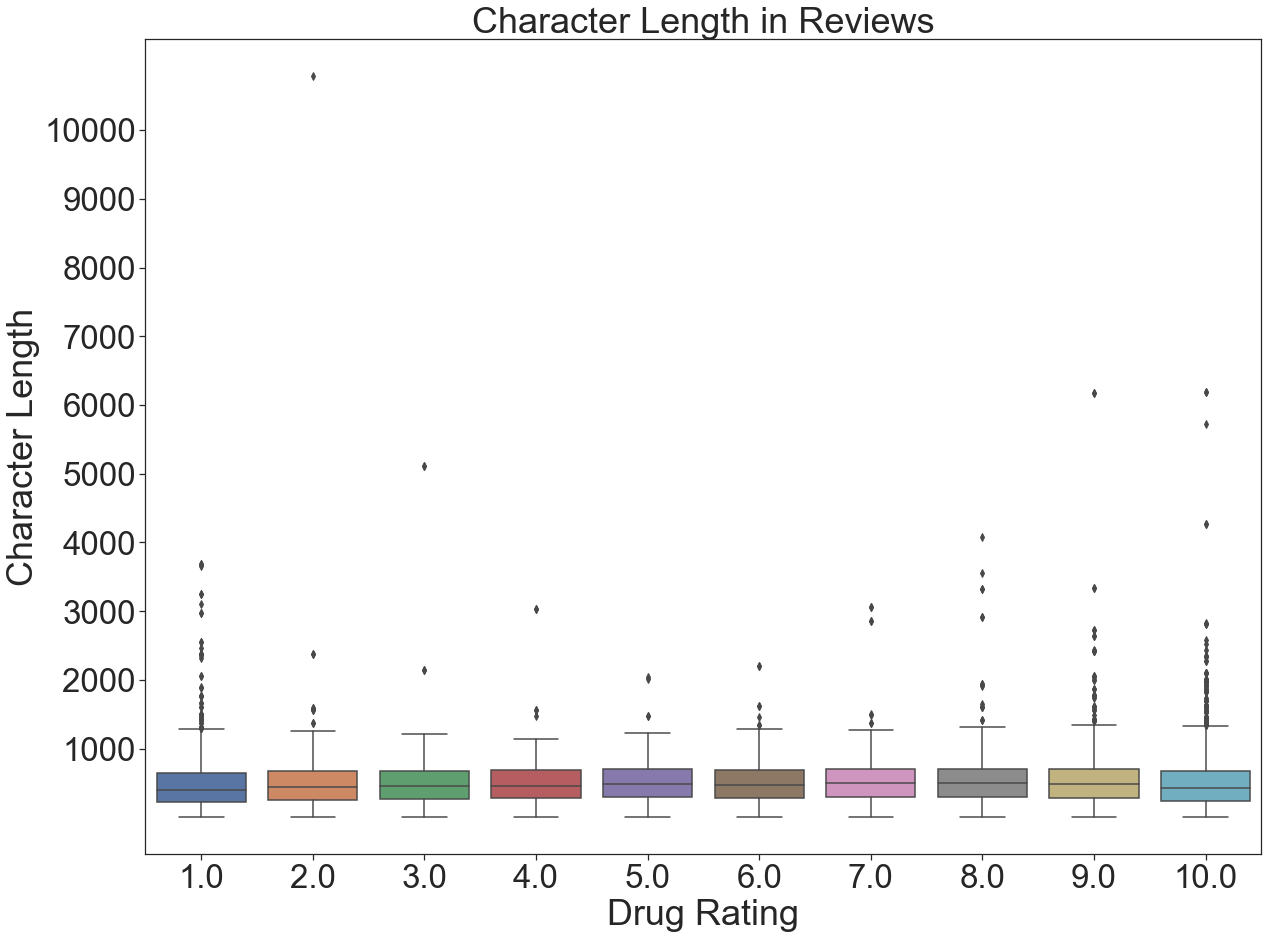

In [28]:
sns.set(style="darkgrid", rc={'figure.figsize':(20,15)},color_codes=True,font_scale=3)
sns.set_style("ticks")
sns.boxplot(x='rating', y='review_length', data=drugs)

plt.yticks(list(range(10000, 0, -1000)))
plt.title('Character Length in Reviews')
plt.xlabel('Drug Rating')           
plt.ylabel('Character Length');

plt.savefig('character length of reviews.png');

In [29]:
sns.set(style="darkgrid", rc={'figure.figsize':(20,15)},color_codes=True,font_scale=15)
g = sns.FacetGrid(data=drugs, col='rating', height=50, aspect=1, col_wrap=3)
g.map(plt.hist, 'review_length', bins=30,  color="r")
plt.xlabel('Character Length');

In [30]:
drugs.review_length.describe()

count    215063.000000
mean        458.620748
std         240.995226
min           3.000000
25%         262.000000
50%         456.000000
75%         690.000000
max       10787.000000
Name: review_length, dtype: float64

In [31]:
drugs[drugs['review_length'] ==10787]['review'].iloc[0]

'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

In [32]:
drugs[drugs["condition"].str.contains("</span>",na=False)].head(4)

UniqueID        drugName                                   condition  \
105    220696  Loestrin 24 Fe  2</span> users found this comment helpful.   
196     67383         Provera  4</span> users found this comment helpful.   
243     81588             Yaz  3</span> users found this comment helpful.   
264    132965  Loestrin 24 Fe  4</span> users found this comment helpful.   

                                                review  rating       date  \
105  "I&#039;m 16 and  I have been on Loestrin 24 f...     3.0 2010-11-03   
196  "I&#039;m 24 years old and have always had a p...     1.0 2016-03-27   
243  "I took Yaz for a little over 2 years.  From a...     3.0 2010-06-01   
264  "Took this pill for 1.) Acne and 2.) Birth Con...     2.0 2014-06-24   

     usefulCount  review_length  
105            2            718  
196            4            787  
243            3            680  
264            4            749

In [33]:
drugs['word_count'] = drugs['review'].apply(lambda x: len(str(x).split(" ")))
drugs.head()

UniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...     9.0 2012-05-20   
1  "My son is halfway through his fourth week of ...     8.0 2010-04-27   
2  "I used to take another oral contraceptive, wh...     5.0 2009-12-14   
3  "This is my first time using any form of birth...     8.0 2015-11-03   
4  "Suboxone has completely turned my life around...     9.0 2016-11-27   

   usefulCount  review_length  word_count  
0           27             79          17  
1          192            741         141  
2           17            755         133  
3           10            448          89  
4           37            719         134

In [34]:
# total word count in all of the review columns
drugs["review"].str.split().str.len().sum()

18212014

Text(0,0.5,'Word count')

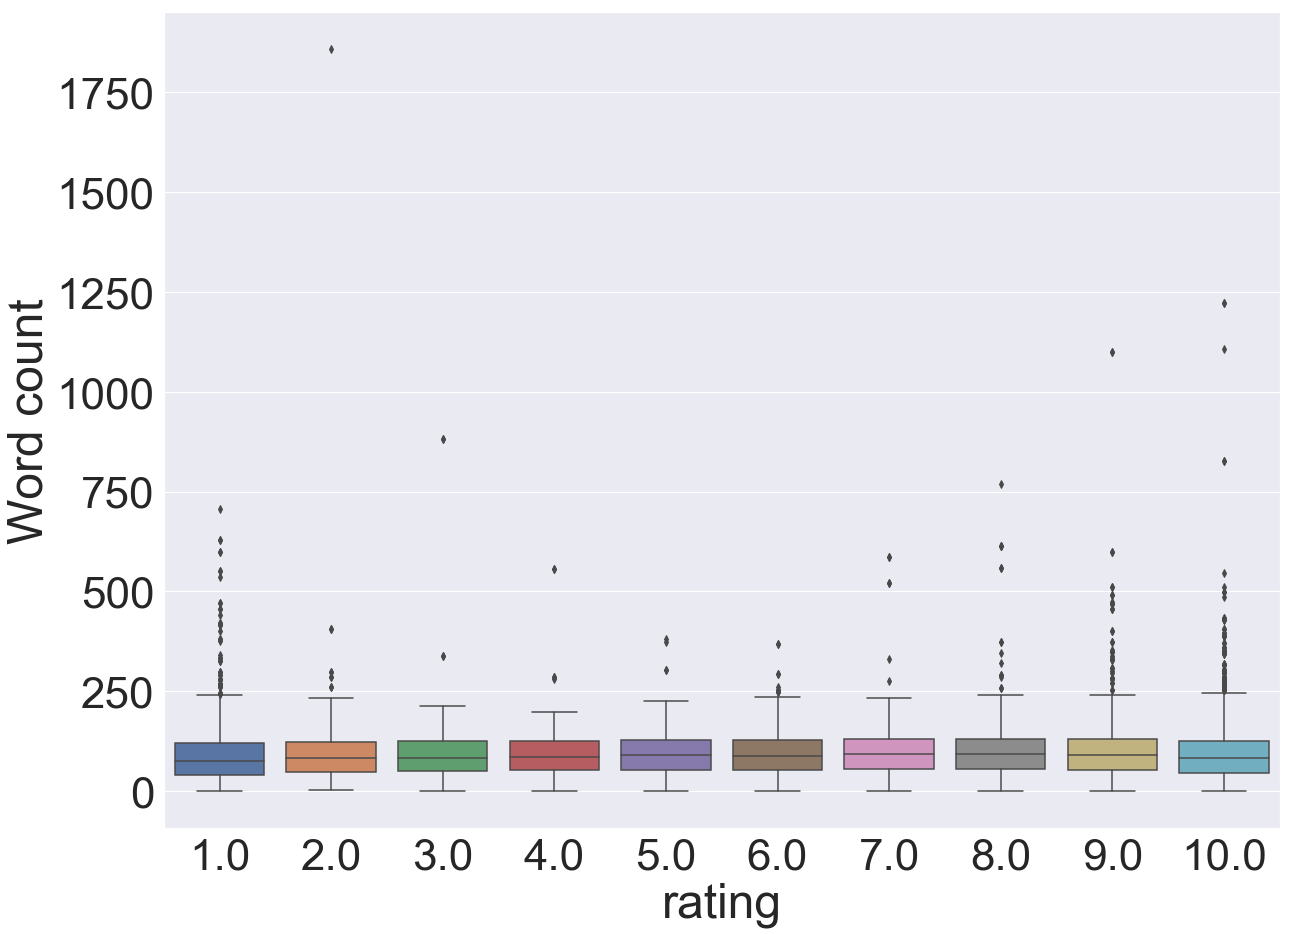

In [35]:
sns.set(style="darkgrid", rc={'figure.figsize':(20,15)},color_codes=True,font_scale=4)
sns.boxplot(x='rating', y='word_count', data=drugs)
plt.ylabel('Word count')

In [36]:
drugs.tail()

UniqueID        drugName                  condition  \
215058    159999       Tamoxifen  Breast Cancer, Prevention   
215059    140714    Escitalopram                    Anxiety   
215060    130945  Levonorgestrel              Birth Control   
215061     47656      Tapentadol                       Pain   
215062    113712       Arthrotec                   Sciatica   

                                                   review  rating       date  \
215058  "I have taken Tamoxifen for 5 years. Side effe...    10.0 2014-09-13   
215059  "I&#039;ve been taking Lexapro (escitaploprgra...     9.0 2016-10-08   
215060  "I&#039;m married, 34 years old and I have no ...     8.0 2010-11-15   
215061  "I was prescribed Nucynta for severe neck/shou...     1.0 2011-11-28   
215062                                      "It works!!!"     9.0 2009-09-13   

        usefulCount  review_length  word_count  
215058           43            533          97  
215059           11            763         130  
215060            7            780         149  
215061           20            200          34  
215062           46             13           2

In [37]:
drugs.word_count.describe()

count    215063.000000
mean         85.632029
std          45.323405
min           1.000000
25%          49.000000
50%          85.000000
75%         127.000000
max        1857.000000
Name: word_count, dtype: float64

In [38]:
drugs.tail()

UniqueID        drugName                  condition  \
215058    159999       Tamoxifen  Breast Cancer, Prevention   
215059    140714    Escitalopram                    Anxiety   
215060    130945  Levonorgestrel              Birth Control   
215061     47656      Tapentadol                       Pain   
215062    113712       Arthrotec                   Sciatica   

                                                   review  rating       date  \
215058  "I have taken Tamoxifen for 5 years. Side effe...    10.0 2014-09-13   
215059  "I&#039;ve been taking Lexapro (escitaploprgra...     9.0 2016-10-08   
215060  "I&#039;m married, 34 years old and I have no ...     8.0 2010-11-15   
215061  "I was prescribed Nucynta for severe neck/shou...     1.0 2011-11-28   
215062                                      "It works!!!"     9.0 2009-09-13   

        usefulCount  review_length  word_count  
215058           43            533          97  
215059           11            763         130  
215060            7            780         149  
215061           20            200          34  
215062           46             13           2

# smallest word count

In [39]:
drugs[drugs['word_count'] ==1]['review'].head()

371      "Headache"
1090        "Great"
1914      "Awesome"
2097    "expensive"
2193         "Good"
Name: review, dtype: object

In [40]:
freq = pd.Series(' '.join(drugs['review']).split()).value_counts()[:25]
freq

I       883057
and     563694
the     484954
to      425525
a       376651
my      330282
it      266069
for     260027
was     229373
of      226444
have    223421
on      173244
in      156598
is      147266
had     146513
but     144612
this    136890
with    134673
that    126769
me      119671
been    102493
not     100349
"I       91674
so       89331
at       78326
dtype: int64

In [41]:
freq2 = pd.Series(' '.join(drugs['review']).split()).value_counts()[-25:]
freq2

parts!!             1
Governor            1
tiimes              1
&hearts;"           1
Checkup             1
puzzled."           1
cysitic             1
DVD&#039;s          1
m/day.              1
KIDDING             1
LEVOFLOXACIN!!      1
(useless)           1
Piper               1
Propanonol          1
enough...low        1
precedures          1
mosquitos.          1
headfog,            1
awhile(3            1
mental/cognitive    1
UTI&#039;s;         1
coul                1
sleepy.2:30,        1
masturbating        1
logical."           1
dtype: int64

In [42]:
stop = set(stopwords.words("english"))
stop.update(("mg","day", 'month', 'wa','first','time', 'took','week', 'year', 'phentermine', 'adipex', 'belviq', 'contrave'))

In [111]:
from nltk.stem import PorterStemmer

In [114]:
clean_text = []
for index in range(len(drugs)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', drugs['review'][index])
    
    
    #Convert to lowercase
    text = text.lower()
    
    # Additiona characters
    #text_col_tags = re.sub("[!@#$+%*:()'-]", ' ', text_col_lower)
    
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
#     ##Stemming
#     ps=PorterStemmer()
#     text = [ps.stem(word) for word in text] 

    #Lemmatisation
#     word_lemma = WordNetLemmatizer()
#     text = [word_lemma.lemmatize(word) for word in text] 
    text = " ".join(text)
    clean_text.append(text)
    
drugs['clean_text'] = clean_text

In [115]:
drugs.head()

UniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...     9.0 2012-05-20   
1  "My son is halfway through his fourth week of ...     8.0 2010-04-27   
2  "I used to take another oral contraceptive, wh...     5.0 2009-12-14   
3  "This is my first time using any form of birth...     8.0 2015-11-03   
4  "Suboxone has completely turned my life around...     9.0 2016-11-27   

   usefulCount  review_length  word_count  \
0           27             79          17   
1          192            741         141   
2           17            755         133   
3           10            448          89   
4           37            719         134   

                                          clean_text rating_class  \
0  it has no side effect i take it in combination...     positive   
1  my son is halfway through his fourth week of i...     positive   
2  i used to take another oral contraceptive whic...      neutral   
3  this is my first time using any form of birth ...     positive   
4  suboxone has completely turned my life around ...     positive   

   rating_class_numeric  
0                     2  
1                     2  
2                     1  
3                     2  
4                     2

In [116]:
from textblob import TextBlob
drugs['clean_text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    it has no side effect i take it in combination...
1    my son is halfway through his fourth week of i...
2    i used to take another oral contraceptive whic...
3    this is my first time using any form of birth ...
4    suboxone has completely turned my life around ...
Name: clean_text, dtype: object

In [61]:
#drugs.clean_text=drugs.clean_text.apply(lambda x: " ".join(x))

In [117]:
rating_10 = drugs.loc[(drugs.rating == 10)].reset_index()
rating_1 = drugs.loc[(drugs.rating == 1)].reset_index()


In [118]:
rating_10['clean_text'][40]

'i just want to say that after taking a lot of other anti depressant meds this is the one besides only having side effect diarrhea that went away after wks it s really changed my life i recommend this to anyone who has tried other meds that have not worked'

In [119]:
rating_1['clean_text'][1000]

'my blood sugar s were constantly in the to range i experienced a burning sensation in my stomach and stomach pain and discomfort constantly i had extreme thirst my fluid intake doubled i was drinking approximately to gallons of fluid a day with frequent urination finally my stomach discomfort reached such a high level that i had to stop taking the medication my blood sugar s were still in the upper and lower range as well so i thought thw medicatio was ineffective as well and as my side effects were no longer tolerable'

In [120]:
capsule = np.array(Image.open("Download-Capsule-PNG-Images.png"))

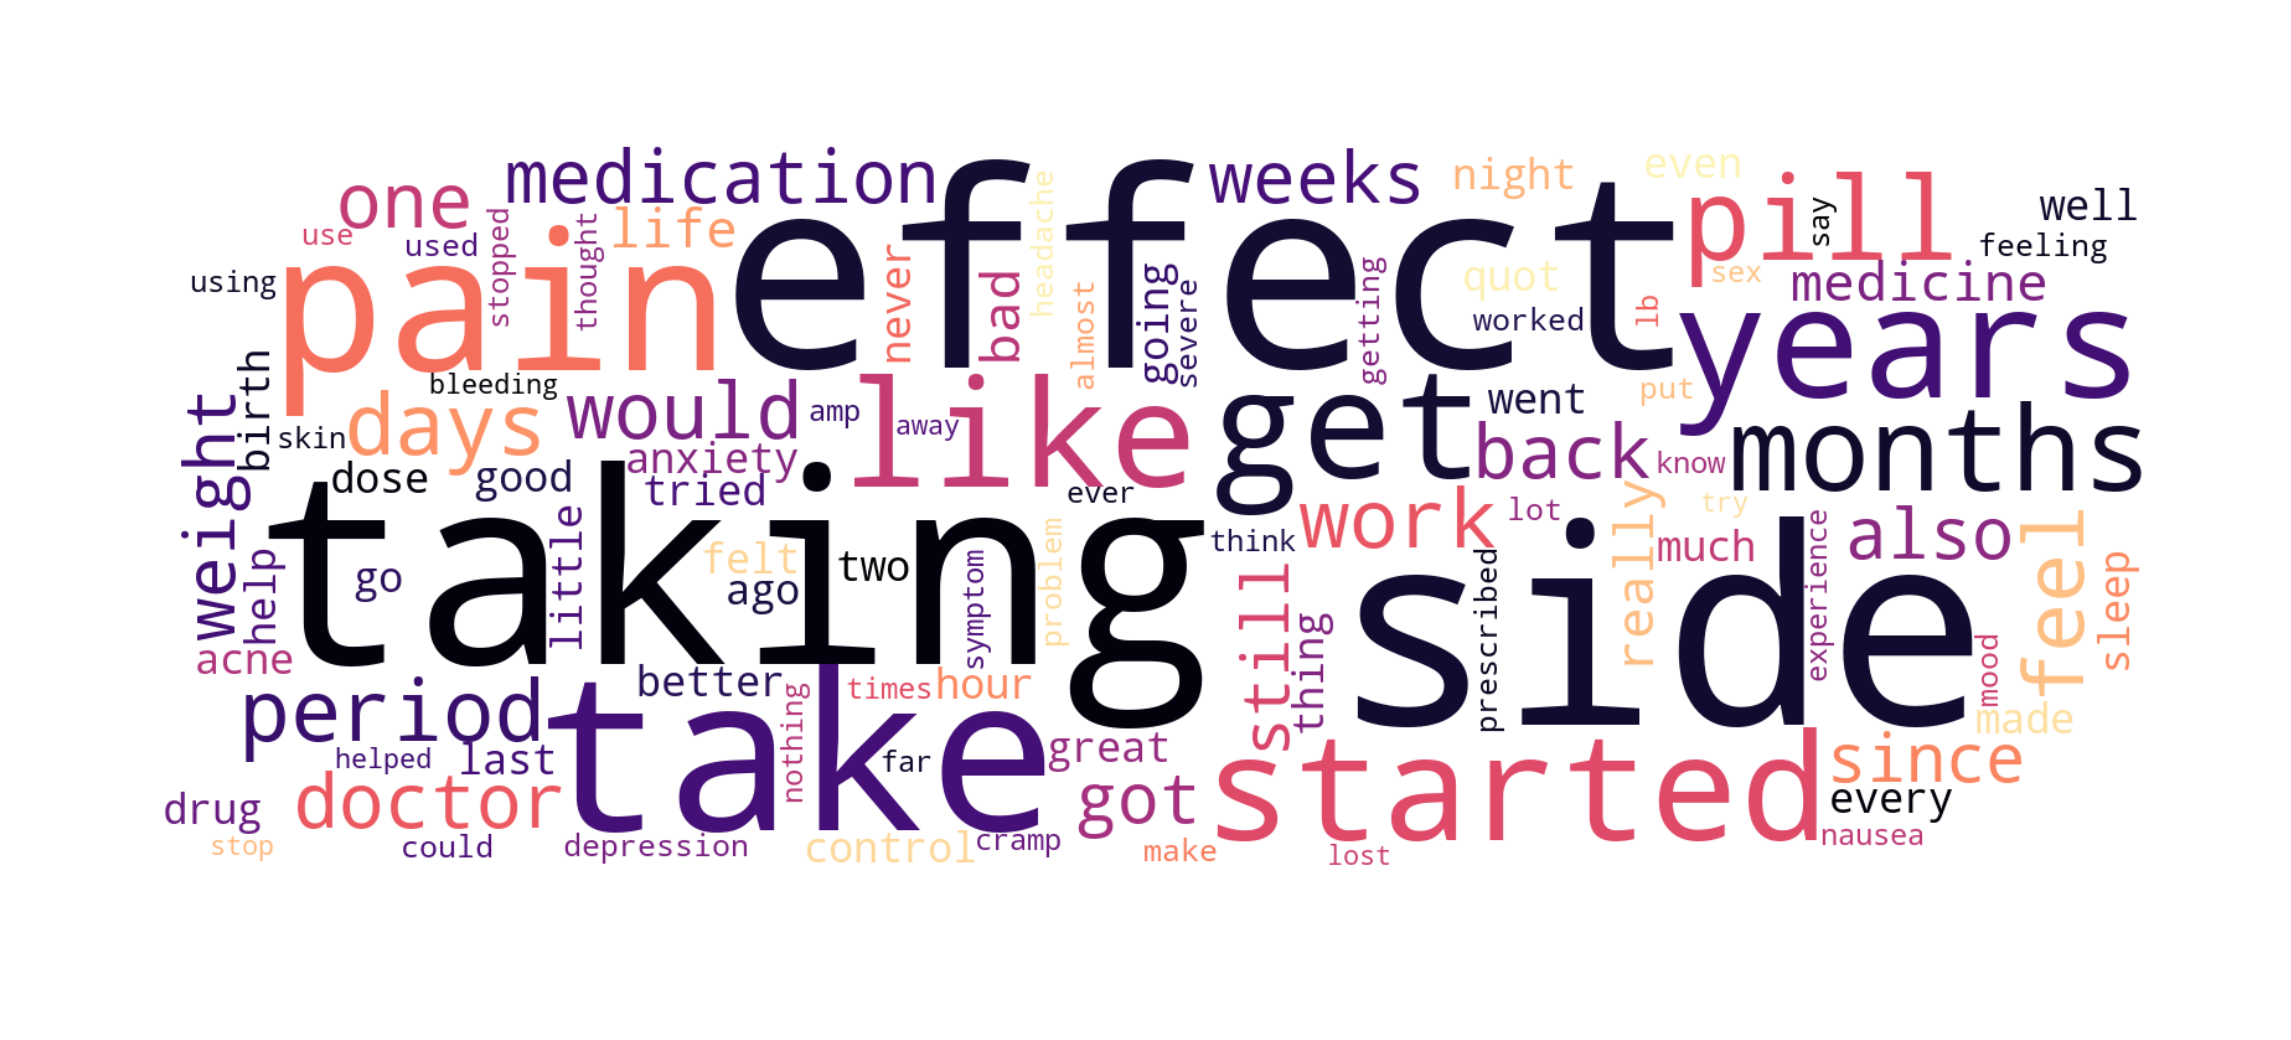

In [121]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


wordcloud = WordCloud(width = 3000,
    height = 2000,background_color='white',colormap=plt.cm.magma, mask = capsule,
                          stopwords=stop,
                          max_words=100,
                           
                          random_state=42,collocations=False
                         ).generate(str(clean_text))

#print(wordcloud)
plt.figure(figsize = (40, 30), edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("word2.png")
plt.show()



In [ ]:
# cv=CountVectorizer(max_df=0.8,stop_words=stop, max_features=10000, ngram_range=(1,3))
# X=cv.fit_transform(clean_text)

            Bi-gram         Freq
0      side effects  1694.474802
1         have been  1294.459002
2            for me  1246.463365
3            it was  1122.243205
4            in the  1115.655764
5           been on  1074.157824
6            and it  1028.652626
7            of the  1022.765062
8         the first  1005.999129
9             in my   946.255260
10           to the   884.127171
11            it is   879.478956
12         and have   879.205635
13          for the   868.148211
14          ve been   848.593022
15           on the   835.930515
16  this medication   828.111227
17          my life   767.907676
18        my doctor   767.422665
19    birth control   766.387093
20           and my   747.562202
21        my period   747.274448
22            to be   747.129856
23    this medicine   739.179904
24         have had   728.741421
25            of my   725.938070
26         the only   715.356207
27          this is   710.297929
28            on my   709.510165
29        

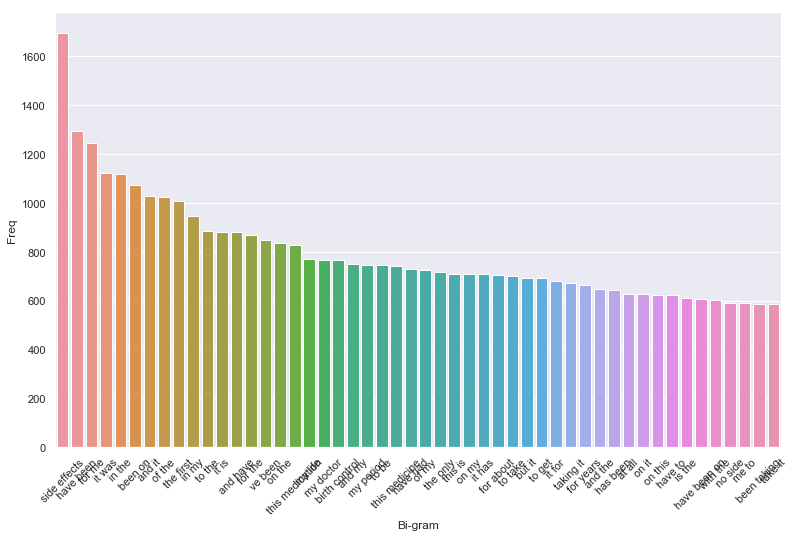

In [122]:
#Most frequently occuring Bi-grams
def get_top_n2_words(clean_text, n=None):
    vec1 = TfidfVectorizer(ngram_range = (2,3), min_df = 5).fit(clean_text)
    bag_of_words = vec1.transform(clean_text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(clean_text, n=50)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45);

In [123]:
top2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
Bi-gram    50 non-null object
Freq       50 non-null float64
dtypes: float64(1), object(1)
memory usage: 880.0+ bytes


In [124]:
capsule2 = np.array(Image.open("Download-Capsule-High-Quality-PNG.png"))

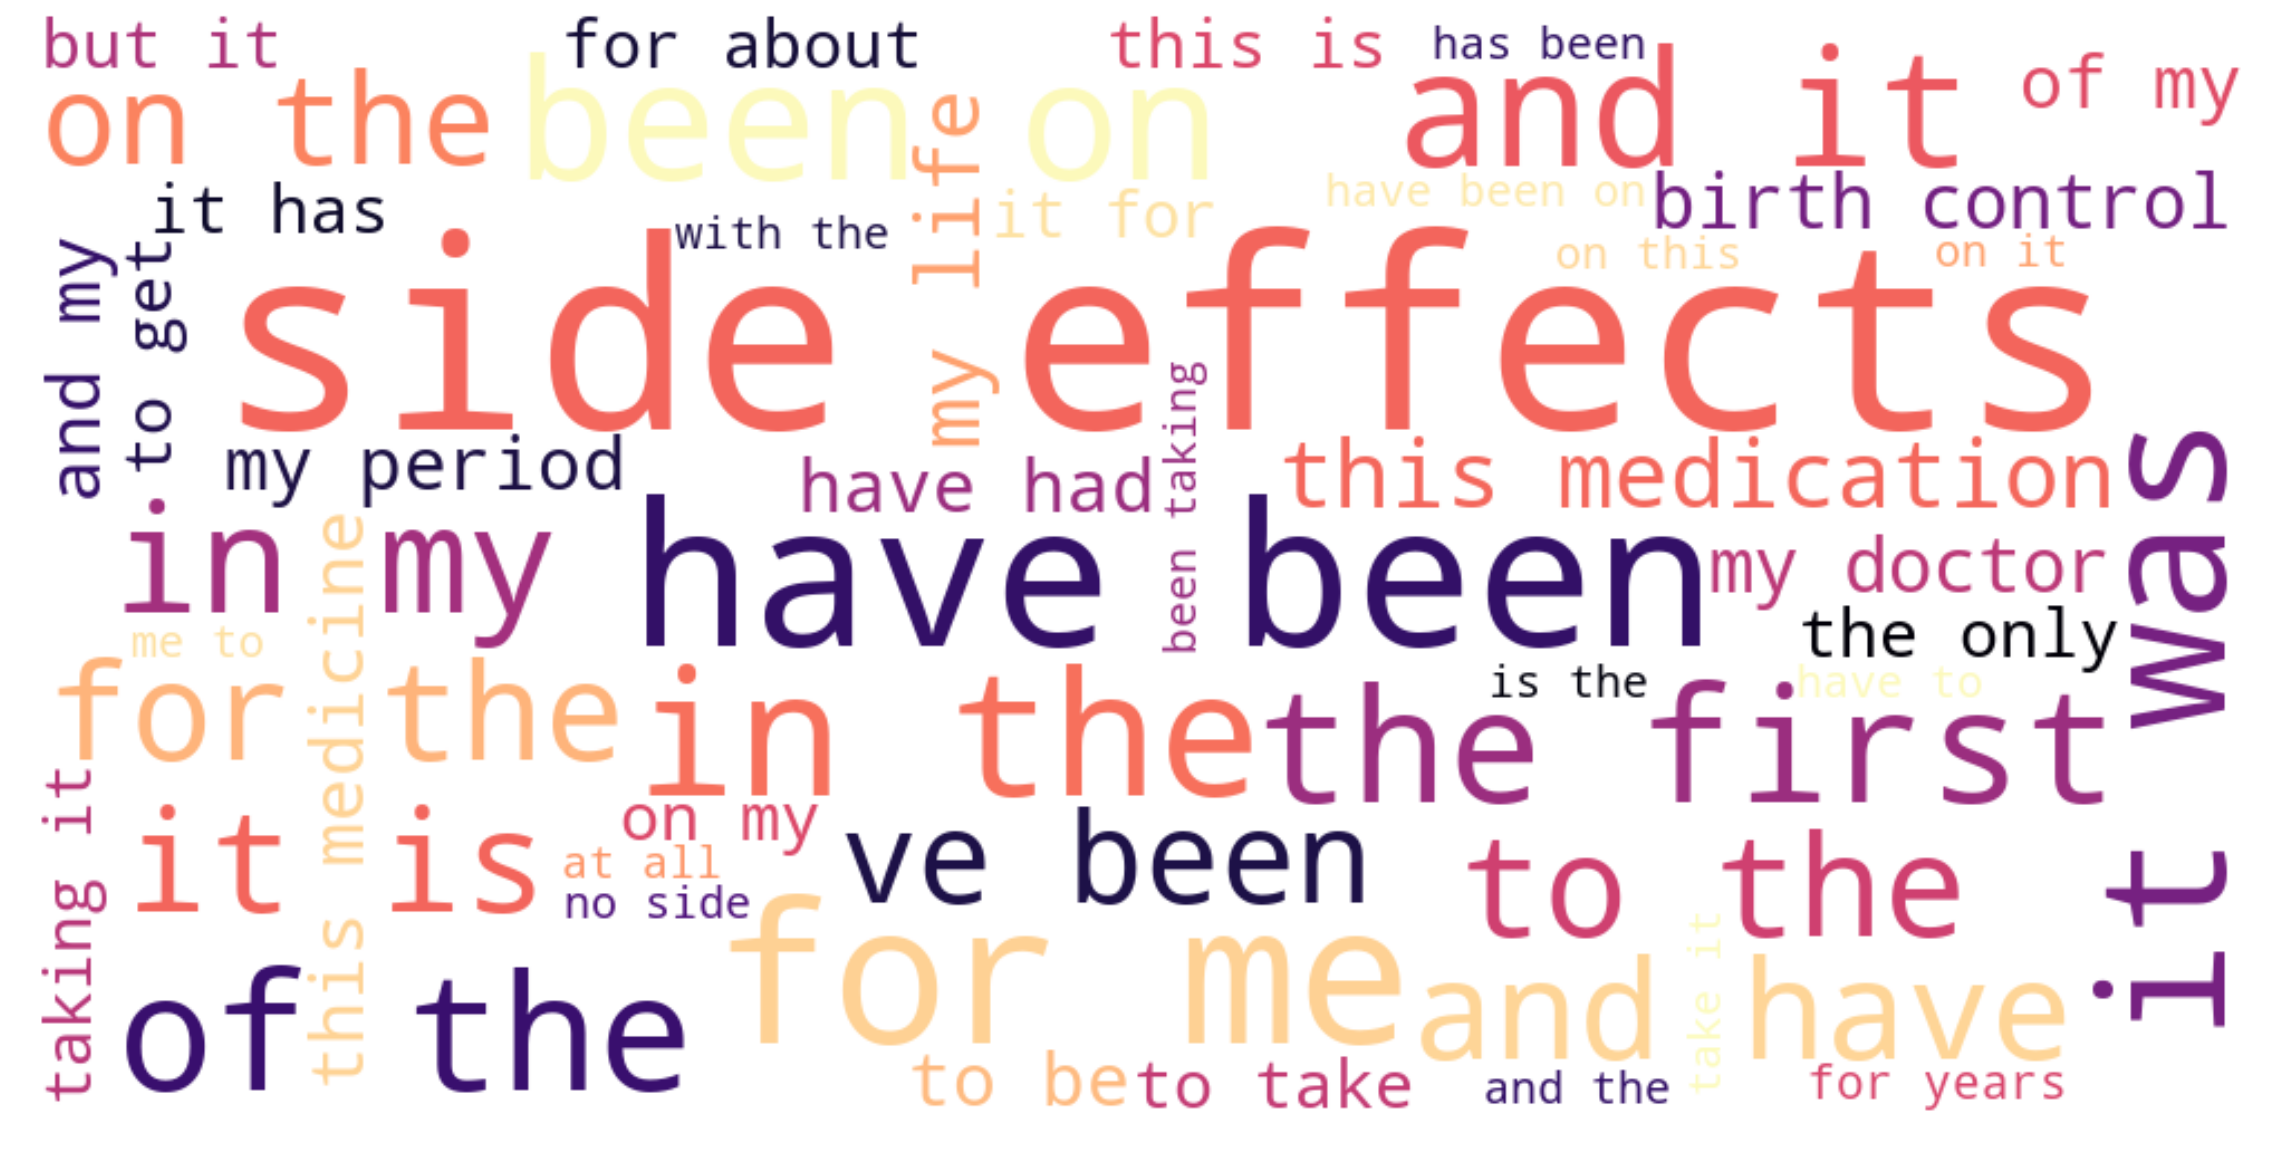

In [125]:
bigrams = {}
for w, x in top2_df.values:
    bigrams[w] = x
wordcloud = WordCloud(width = 1000,
    height = 500,background_color='white',colormap=plt.cm.magma,margin=5,
                     min_word_length =2, relative_scaling=1,collocations=False, contour_width=3,contour_color='firebrick')
wordcloud.generate_from_frequencies(bigrams)
plt.figure(figsize = (40, 30),
    
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

              Tri-gram        Freq
0         have been on  863.465798
1      no side effects  825.725554
2     the side effects  749.324060
3           ve been on  658.501745
4     have been taking  520.550732
5        for the first  458.224213
6       in the morning  442.820813
7         all the time  409.158270
8          this is the  385.582642
9   this birth control  382.393728
10        been on this  379.520715
11           on it for  377.832523
12          been on it  374.620496
13           put me on  358.157235
14      the first time  356.449456
15         it has been  331.250997
16       and have been  320.376405
17      ve been taking  314.064033
18          to take it  312.449598
19         is the only  307.230015
20    for about months  302.569848
21    any side effects  299.304745
22          it made me  288.097173
23      the only thing  286.353415
24       for years and  284.342973


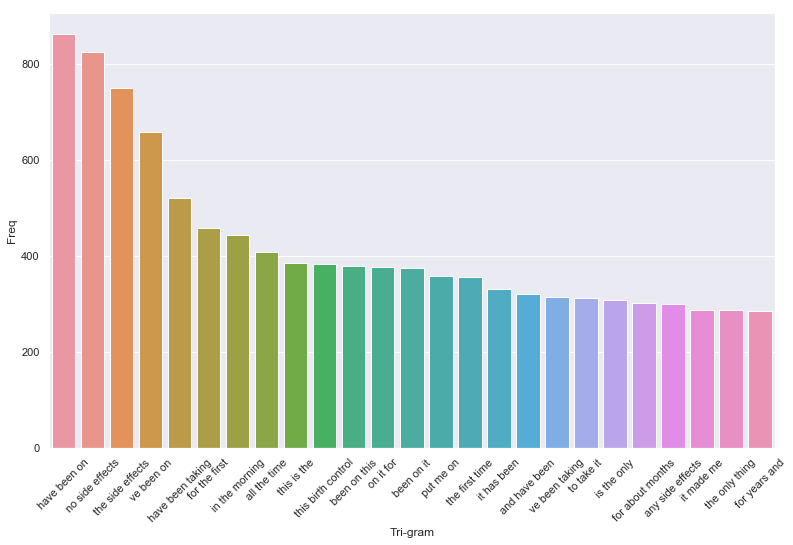

In [126]:
#Most frequently occuring Tri-grams
def get_top_n3_words(clean_text, n=None):
    vec1 = TfidfVectorizer(ngram_range = (3,3), min_df = 5).fit(clean_text)
    bag_of_words = vec1.transform(clean_text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(clean_text, n=25)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45);

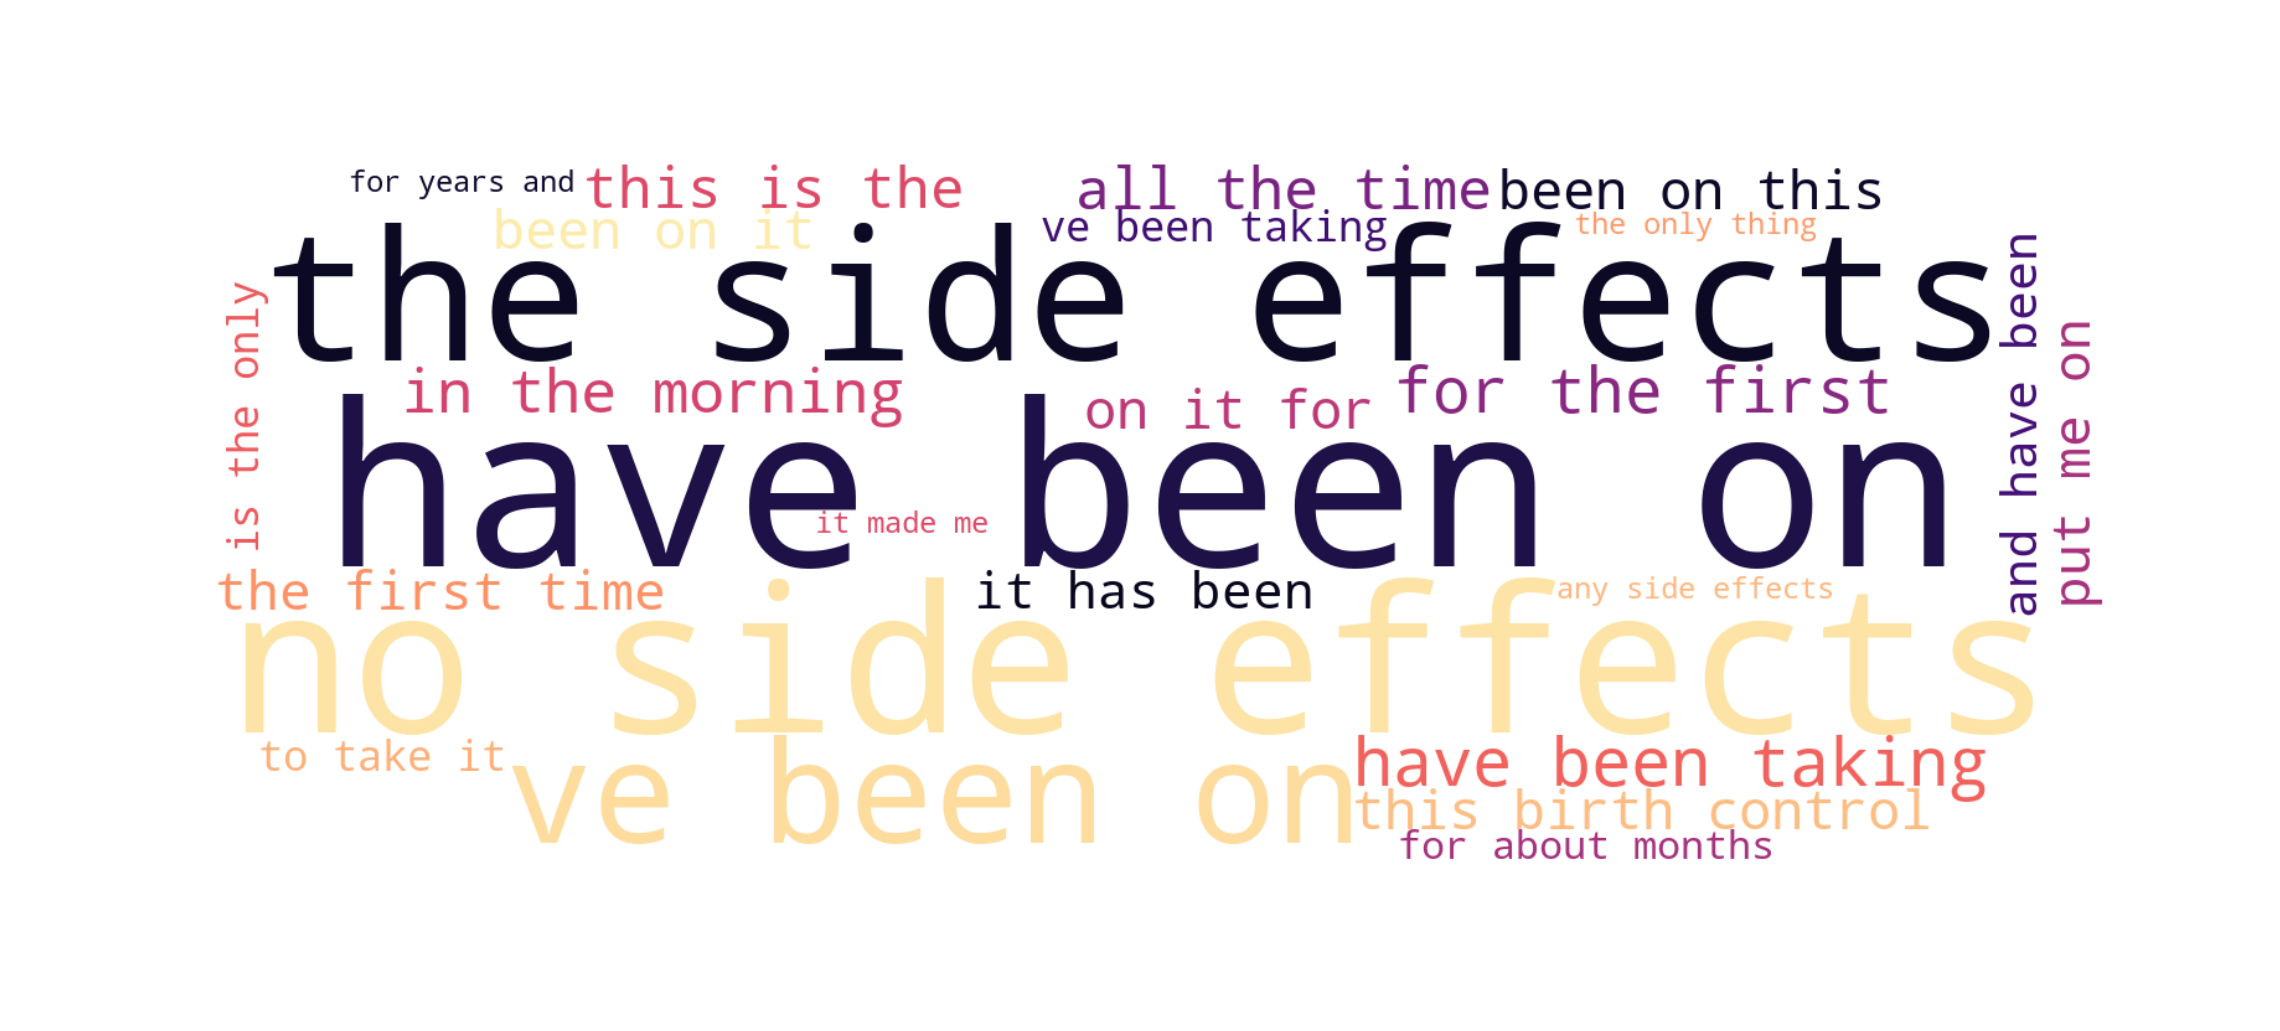

In [127]:
trigrams = {}
for w, x in top3_df.values:
    trigrams[w] = x
wordcloud = WordCloud(width = 1000,
    height = 500,background_color='white', mask = capsule,colormap=plt.cm.magma,collocations=False).generate_from_frequencies(trigrams)

plt.figure(figsize = (40, 30),
    
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [128]:
def classifier(row):
    
    if row["rating"] >= 7.0:
        return 'positive'
    elif row["rating"] <= 4.0:
        return 'negative'
    else:
        return 'neutral'


In [129]:
def classifier2(row):
    
    if row["rating"] >= 7.0:
        return 2
    elif row["rating"] <= 4.0:
        return 0
    else:
        return 1

In [130]:
drugs['rating_class'] = drugs.apply(classifier, axis=1)
drugs['rating_class_numeric'] = drugs.apply(classifier2, axis=1)

In [131]:
drugs['rating_class'].value_counts()

positive    142306
negative     53572
neutral      19185
Name: rating_class, dtype: int64

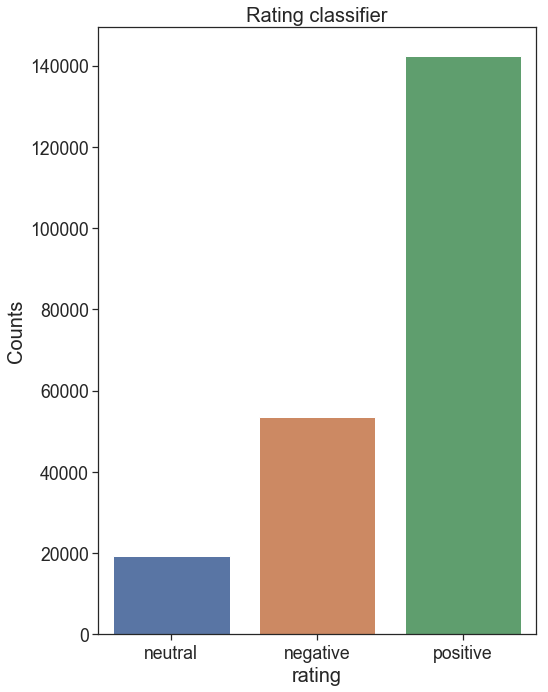

In [132]:
sns.set(rc={'figure.figsize':(8,10)}, font_scale=1.6)
sns.set_style("ticks")
partial = drugs['rating_class'].value_counts(ascending=True, sort=True)
sns.barplot(partial.index, partial.values, alpha=1)
plt.title('Rating classifier', fontsize = 20)
plt.ylabel('Counts', fontsize=20)
plt.xlabel('rating', fontsize=20)
plt.yticks()
plt.tight_layout()
plt.savefig('Imbalanced Class.png')
plt.show()



In [133]:
drugs.head()

UniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...     9.0 2012-05-20   
1  "My son is halfway through his fourth week of ...     8.0 2010-04-27   
2  "I used to take another oral contraceptive, wh...     5.0 2009-12-14   
3  "This is my first time using any form of birth...     8.0 2015-11-03   
4  "Suboxone has completely turned my life around...     9.0 2016-11-27   

   usefulCount  review_length  word_count  \
0           27             79          17   
1          192            741         141   
2           17            755         133   
3           10            448          89   
4           37            719         134   

                                          clean_text rating_class  \
0  it has no side effect i take it in combination...     positive   
1  my son is halfway through his fourth week of i...     positive   
2  i used to take another oral contraceptive whic...      neutral   
3  this is my first time using any form of birth ...     positive   
4  suboxone has completely turned my life around ...     positive   

   rating_class_numeric  
0                     2  
1                     2  
2                     1  
3                     2  
4                     2

In [134]:
drugs.clean_text[1:10]

1    my son is halfway through his fourth week of i...
2    i used to take another oral contraceptive whic...
3    this is my first time using any form of birth ...
4    suboxone has completely turned my life around ...
5    nd day on mg started to work with rock hard er...
6    he pulled out but he cummed a bit in me i took...
7    abilify changed my life there is hope i was on...
8    i ve had nothing but problems with the keppera...
9    i had been on the pill for many years when my ...
Name: clean_text, dtype: object

In [135]:
drugs.rating_class.value_counts()

positive    142306
negative     53572
neutral      19185
Name: rating_class, dtype: int64

In [136]:
drugs.isnull().sum()

UniqueID                   0
drugName                   0
condition               1194
review                     0
rating                     0
date                       0
usefulCount                0
review_length              0
word_count                 0
clean_text                 0
rating_class               0
rating_class_numeric       0
dtype: int64

In [141]:
#drugs.to_csv('drugs_model2.csv')